In [2]:
import json
import csv

with open("data/life_ladder.json", "r") as f:
    data = json.load(f)

with open("data/world_regions.csv") as f:
    reader = csv.DictReader(f)
    country_to_region = {}
    for row in reader:
        country_to_region[row["Entity"]] = row[
            "world-regions-according-to-the-united-nations"
        ]

    region_to_countries = {}
    for country, region in country_to_region.items():
        if region not in region_to_countries:
            region_to_countries[region] = set()
        region_to_countries[region].add(country)

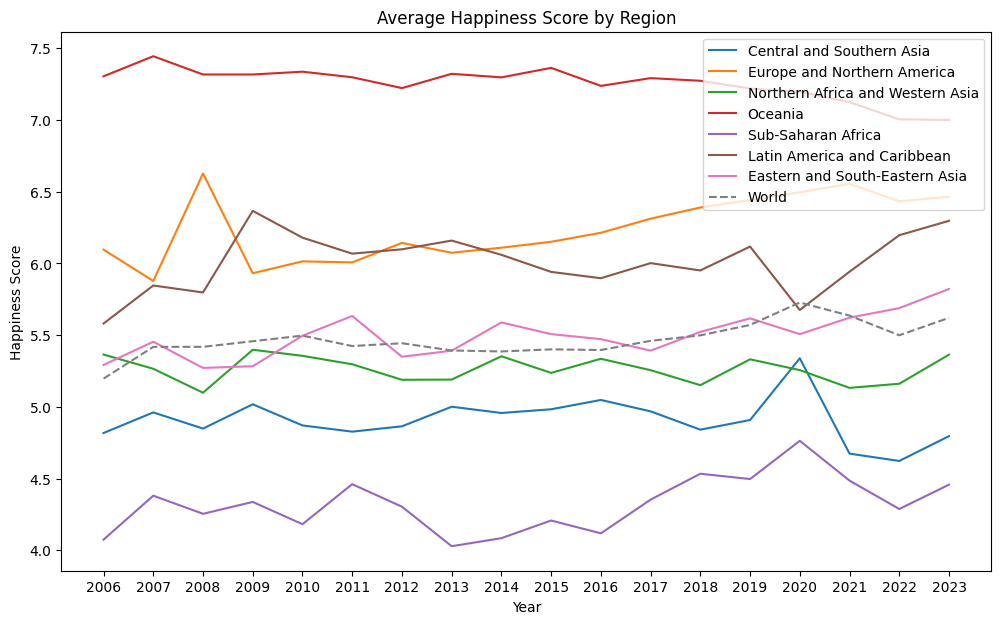

In [13]:
# Line graph with a dashed line of the world average happiness scores for each year
# and a solid line for the average happiness score of each region for each year.
# The x-axis should be the year and the y-axis should be the happiness score.
# The graph should have a legend that shows the region and the world average.
# The graph should have a title and labels for the x and y axes.

import matplotlib.pyplot as plt

years = [str(year) for year in range(2006, 2024)]
world_happiness = {}
region_happiness = {}
for year in years:
    world_happiness[year] = []
    region_happiness[year] = {}
    for region in region_to_countries:
        region_happiness[year][region] = []

for country in data:
    for year, happiness in data[country].items():
        if year >= "2006":
            world_happiness[year].append(happiness)
            region = country_to_region[country]
            region_happiness[year][region].append(happiness)

world_happiness = {
    year: sum(happiness) / len(happiness) for year, happiness in world_happiness.items()
}
region_happiness = {
    year: {
        region: sum(happiness) / len(happiness) if happiness else None
        for region, happiness in region_happiness[year].items()
    }
    for year in region_happiness
}

region_happiness["2009"]["Oceania"] = region_happiness["2008"]["Oceania"]

plt.figure(figsize=(12, 7))
for region in region_to_countries:
    plt.plot(
        years,
        [region_happiness[year][region] for year in years],
        label=region,
        linestyle="-",
    )
plt.plot(years, [world_happiness[year] for year in years], label="World", linestyle="--")
plt.title("Average Happiness Score by Region")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.legend(loc="upper right")
plt.show()

In [16]:
print("World Happiness")
print(world_happiness)
print()
print("Region Happiness")
print(region_happiness)


World Happiness
{'2006': 5.1969352893615035, '2007': 5.418291402798073, '2008': 5.418553961407055, '2009': 5.457640127131813, '2010': 5.496782154806199, '2011': 5.424087842849836, '2012': 5.443611861966181, '2013': 5.3933015009936165, '2014': 5.386266734864977, '2015': 5.400948453956927, '2016': 5.396380853991136, '2017': 5.4604214729905935, '2018': 5.4986834154061395, '2019': 5.57099475893941, '2020': 5.727539107717317, '2021': 5.636192835745264, '2022': 5.4990947238036565, '2023': 5.6208109510117685}

Region Happiness
{'2006': {'Central and Southern Asia': 4.8176427483558655, 'Europe and Northern America': 6.096231853260713, 'Northern Africa and Western Asia': 5.364769617716472, 'Oceania': 7.305014133453369, 'Sub-Saharan Africa': 4.0742503296245225, 'Latin America and Caribbean': 5.581019639968872, 'Eastern and South-Eastern Asia': 5.292359709739685}, '2007': {'Central and Southern Asia': 4.961440139346653, 'Europe and Northern America': 5.877555950482686, 'Northern Africa and Wester